In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

np.random.seed(123)      
#The numpy.random.seed() makes the random numbers predictable and is used for reproducibility

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
#Removing the Id and the Unnamed columns
df = df.iloc[:,1:-1]

In [5]:
label_encoder = LabelEncoder()
df.iloc[:,0] = label_encoder.fit_transform(df.iloc[:,0]).astype('float64')

In [6]:
#Next, we encode the Categorical Variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null float64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 

In [7]:
corr = df.corr()
corr.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis        1.000000     0.730029      0.415185        0.742636   
radius_mean      0.730029     1.000000      0.323782        0.997855   
texture_mean     0.415185     0.323782      1.000000        0.329533   
perimeter_mean   0.742636     0.997855      0.329533        1.000000   
area_mean        0.708984     0.987357      0.321086        0.986507   

                area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis        0.708984         0.358560          0.596534        0.696360   
radius_mean      0.987357         0.170581          0.506124        0.676764   
texture_mean     0.321086        -0.023389          0.236702        0.302418   
perimeter_mean   0.986507         0.207278          0.556936        0.716136   
area_mean        1.000000         0.177028          0.498502        0.685983   

                concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                  0.776614       0.330499  ...      0.776454   
radius_mean                0.822529       0.147741  ...      0.969539   
texture_mean               0.293464       0.071401  ...      0.352573   
perimeter_mean             0.850977       0.183027  ...      0.969476   
area_mean                  0.823269       0.151293  ...      0.962746   

                texture_worst  perimeter_worst  area_worst  smoothness_worst  \
diagnosis            0.456903         0.782914    0.733825          0.421465   
radius_mean          0.297008         0.965137    0.941082          0.119616   
texture_mean         0.912045         0.358040    0.343546          0.077503   
perimeter_mean       0.303038         0.970387    0.941550          0.150549   
area_mean            0.287489         0.959120    0.959213          0.123523   

                compactness_worst  concavity_worst  concave points_worst  \
diagnosis                0.590998         0.659610              0.793566   
radius_mean              0.413463         0.526911              0.744214   
texture_mean             0.277830         0.301025              0.295316   
perimeter_mean           0.455774         0.563879              0.771241   
area_mean                0.390410         0.512606              0.722017   

                symmetry_worst  fractal_dimension_worst  
diagnosis             0.416294                 0.323872  
radius_mean           0.163953                 0.007066  
texture_mean          0.105008                 0.119205  
perimeter_mean        0.189115                 0.051019  
area_mean             0.143570                 0.003738  

[5 rows x 31 columns]

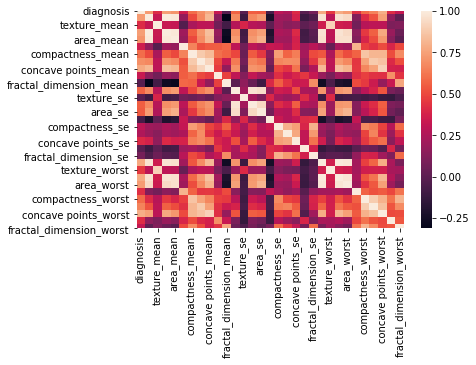

In [8]:
sns.heatmap(corr)

In [9]:
#Next, we compare the correlation between features and remove one of two features that have a correlation higher than 0.9
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False

In [10]:
selected_columns = df.columns[columns]
selected_columns.shape

(21,)

In [11]:
#Above, we can see that only 21 columns were selected.
df = df[selected_columns]
#Now, the dataset has only those columns with correlation less than 0.9

In [12]:
selected_columns = selected_columns[1:].values         # Removing the dignosis column,We are the removing the column diagnosis because it is the column we are trying to predict

In [13]:
import statsmodels.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns

In [14]:
SL = 0.05
data_modeled, selected_columns = backwardElimination(df.iloc[:,1:].values, df.iloc[:,0].values, SL, selected_columns)

In [15]:
result = pd.DataFrame()
result['diagnosis'] = df.iloc[:,0]

In [17]:
df = pd.DataFrame(data = data_modeled, columns = selected_columns)

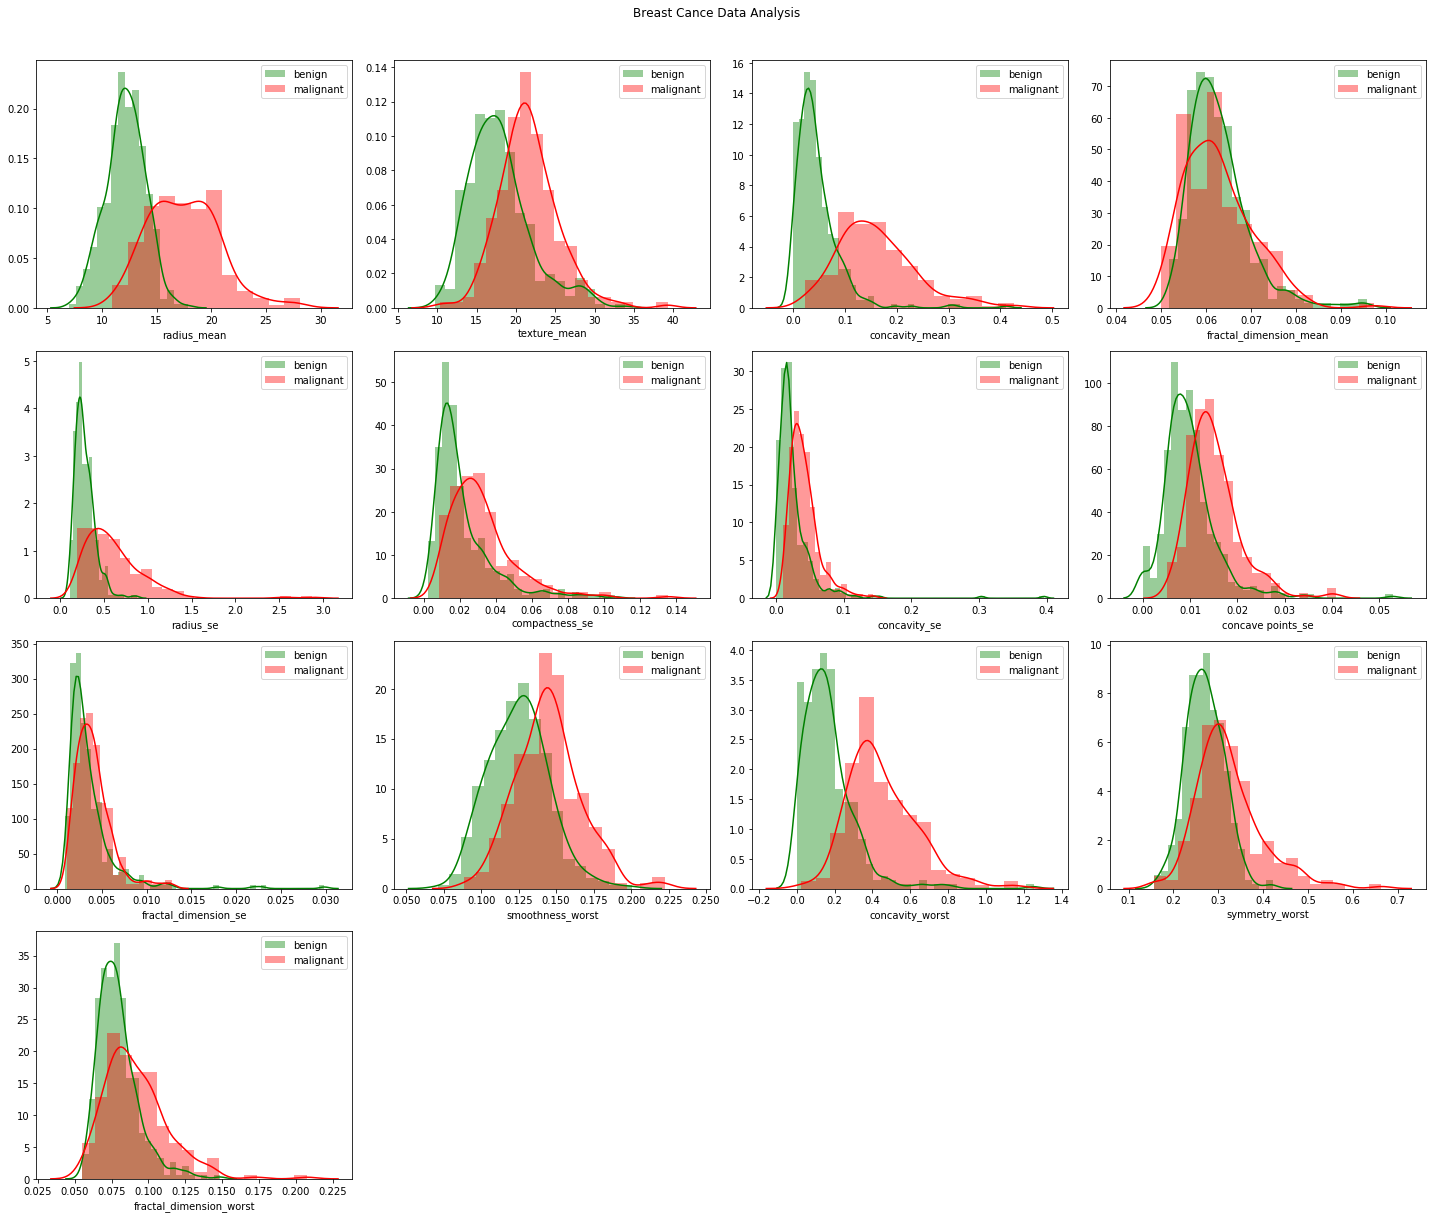

In [18]:
fig = plt.figure(figsize = (20, 25))
j = 0
for i in df.columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(df[i][result['diagnosis']==0], color='g', label = 'benign')
    sns.distplot(df[i][result['diagnosis']==1], color='r', label = 'malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [19]:
#Now we split the data to train and test set. 20% of the data is used to create the test data and 80% to create the train data
x_train, x_test, y_train, y_test = train_test_split(df.values, result.values, test_size = 0.2)

In [20]:
#We are using a Support Vector Classifier with a Gaussian Kernel to make the predictions. We will train the model on our train data and calculate the accuracy of the model using the test data
svc = SVC()              # The default kernel used by SVC is the gaussian kernel
svc.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [21]:
prediction = svc.predict(x_test)

In [22]:
cm = confusion_matrix(y_test, prediction)
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]
print(accuracy)

0.9298245614035088


In [23]:
#Building a model without feature selection and comparing the results
#Next, we repeat all the above steps except feature selection, which are:
#Loading the data
#Removing the unwanted columns
#Encoding the categorical variable
#Splitting the data into train and test set
#Fitting the data to the model
#Making the predictions and calculating the accuracy
data1 = pd.read_csv('data.csv')          
result = pd.DataFrame()
result['diagnosis'] = data1.iloc[:,1]
data1 = data1.iloc[:,2:-1]                         
label_encoder = LabelEncoder()              
data1.iloc[:,0] = label_encoder.fit_transform(data1.iloc[:,0]).astype('float64')    
x_train, x_test, y_train, y_test = train_test_split(data1.values, result.values, test_size = 0.2)      
svc = SVC()
svc.fit(x_train, y_train)                        
prediction = svc.predict(x_test)                 
cm = confusion_matrix(y_test, prediction)        
sum = 0
for i in range(cm.shape[0]):
    sum += cm[i][i]
    
accuracy = sum/x_test.shape[0]                
print(accuracy)

0.7017543859649122
